In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))

In [1]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
from config import input_datadir, result_datadir
import os
import fnmatch
import ARX_Optimization

In [2]:
# Specify Order

m = 2
n = 2

DE_rt_coeffs Doublet1_Q1_only.csv Doublet1_Q1_onlyDE_rt_coeffs_m2_n2_4.xlsx 1.869018986728459
DE_rt_coeffs Rpi1_Q1_only.csv Rpi1_Q1_onlyDE_rt_coeffs_m2_n2_5.xlsx 0.41090271025026315
DE_rt_coeffs Step1.csv Step1DE_rt_coeffs_m2_n2_1.xlsx 0.5768781567009265
MIN_rt_coeffs Doublet1_Q1_only.csv Doublet1_Q1_onlyMIN_rt_coeffs_m2_n2_4.xlsx 1.8690348194608601
MIN_rt_coeffs Rpi1_Q1_only.csv Rpi1_Q1_onlyMIN_rt_coeffs_m2_n2_5.xlsx 0.4108944803864506
MIN_rt_coeffs Step1.csv Step1MIN_rt_coeffs_m2_n2_1.xlsx 0.576879493956211
LSTSQ_rt_coeffs Doublet1_Q1_only.csv Step1MIN_rt_coeffs_m2_n2_1.xlsx 0.33489698401818635
LSTSQ_rt_coeffs Rpi1_Q1_only.csv Rpi1_Q1_onlyLSTSQ_rt_coeffs_m2_n2_5.xlsx 0.27858184623049514
LSTSQ_rt_coeffs Step1.csv Step1LSTSQ_rt_coeffs_m2_n2_4.xlsx 0.2517652233463521


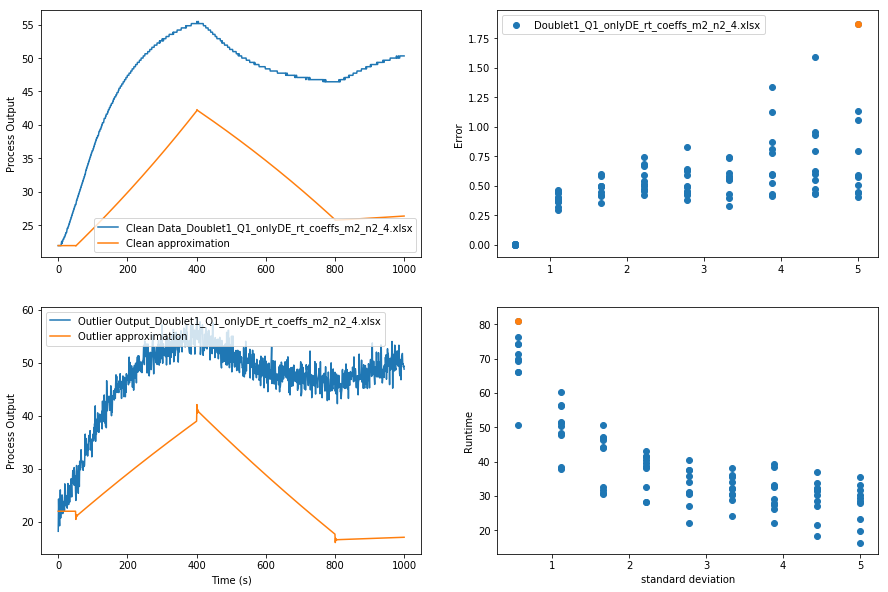

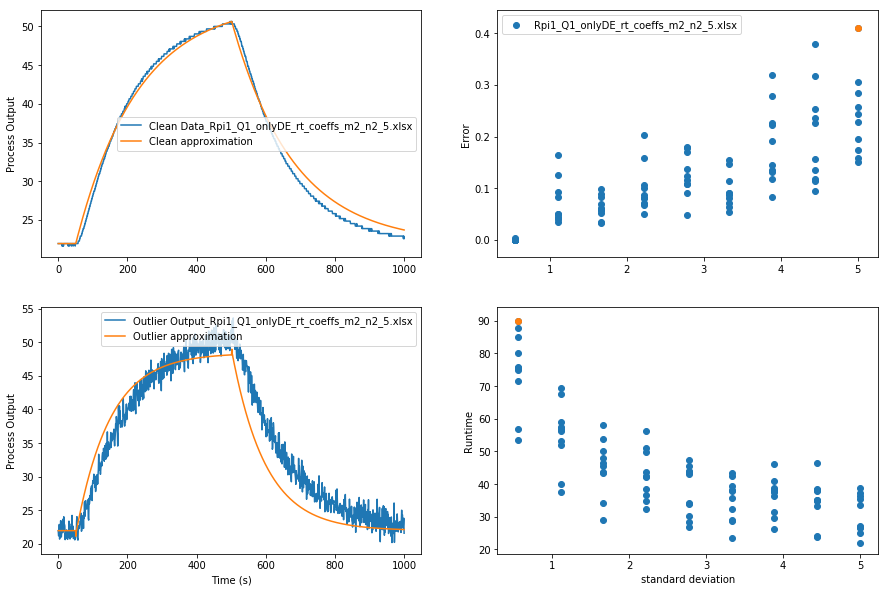

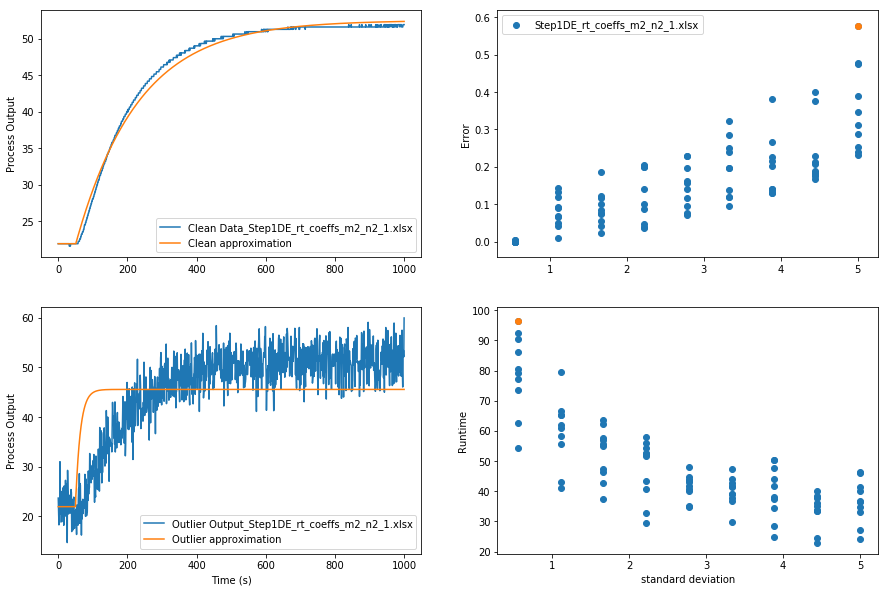

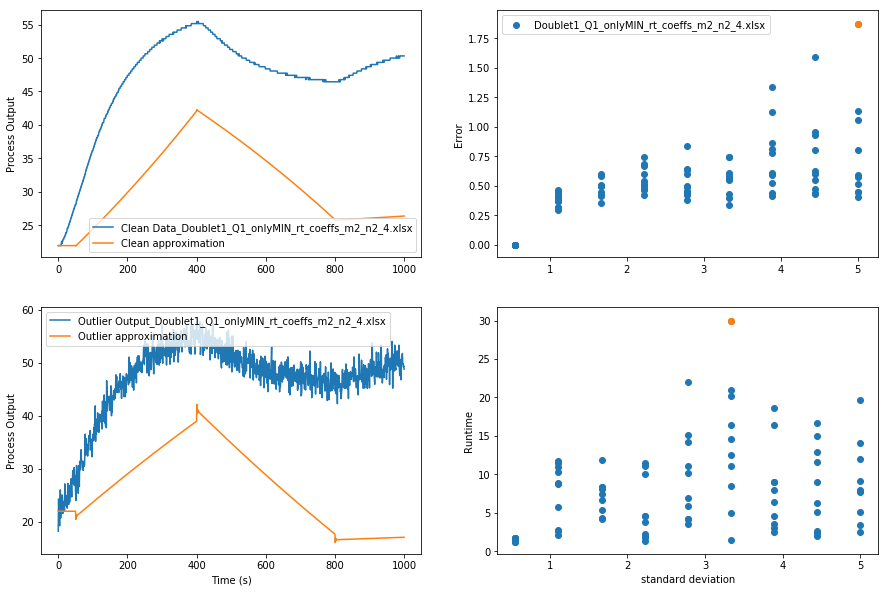

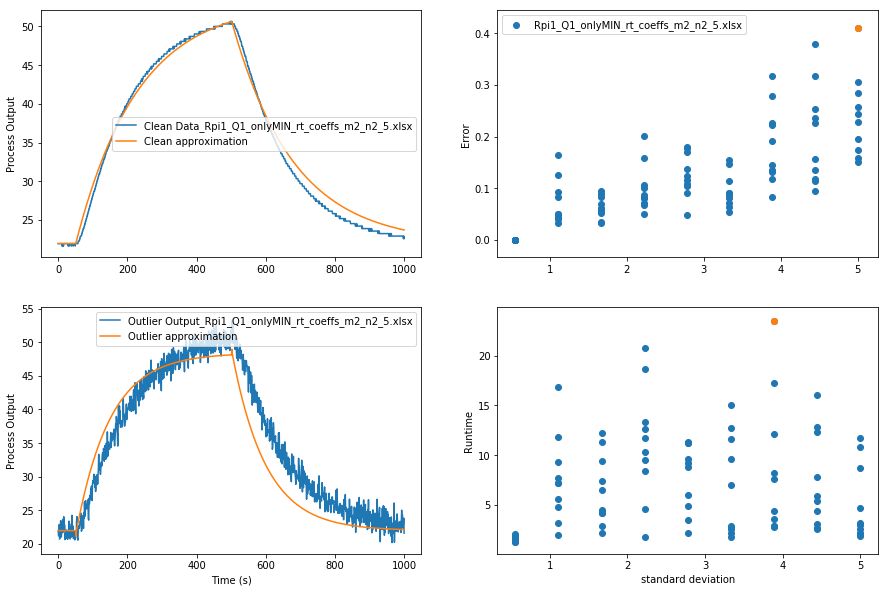

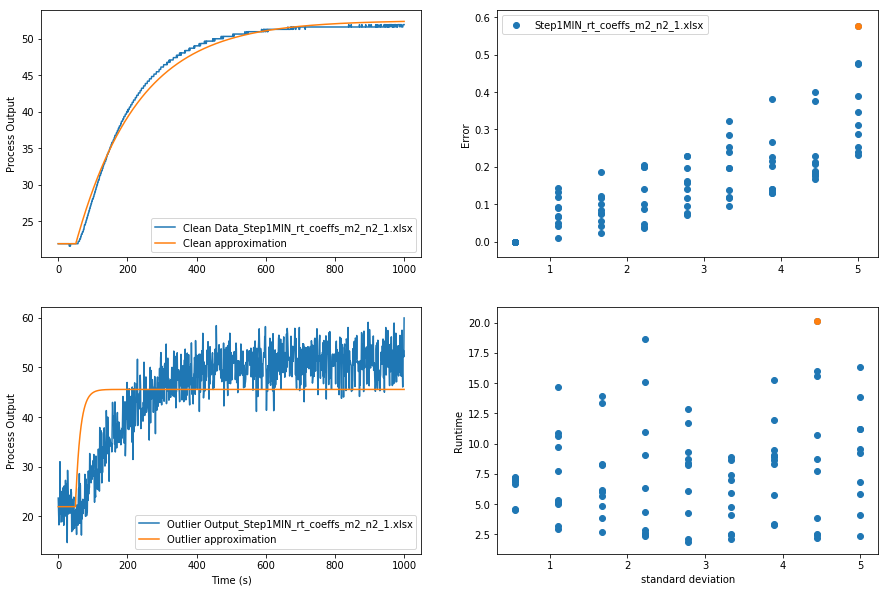

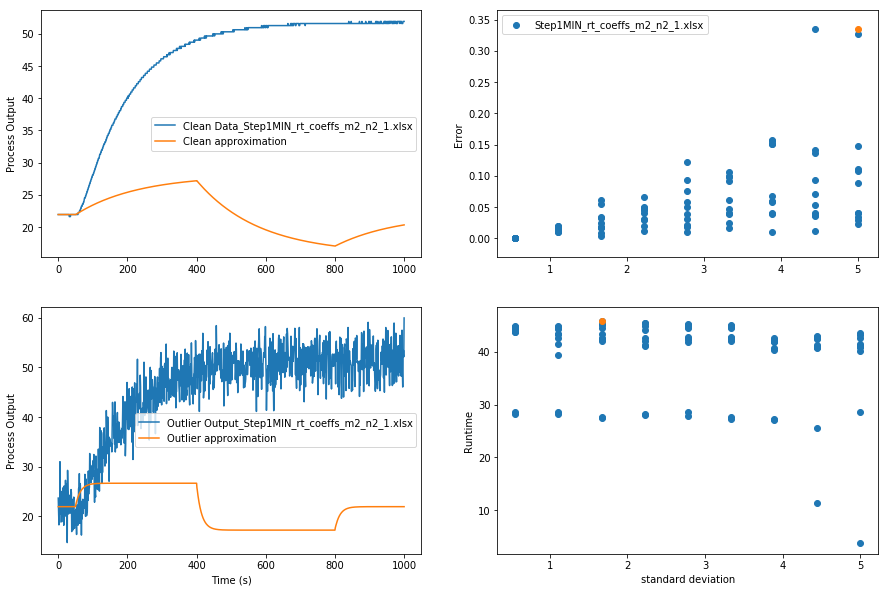

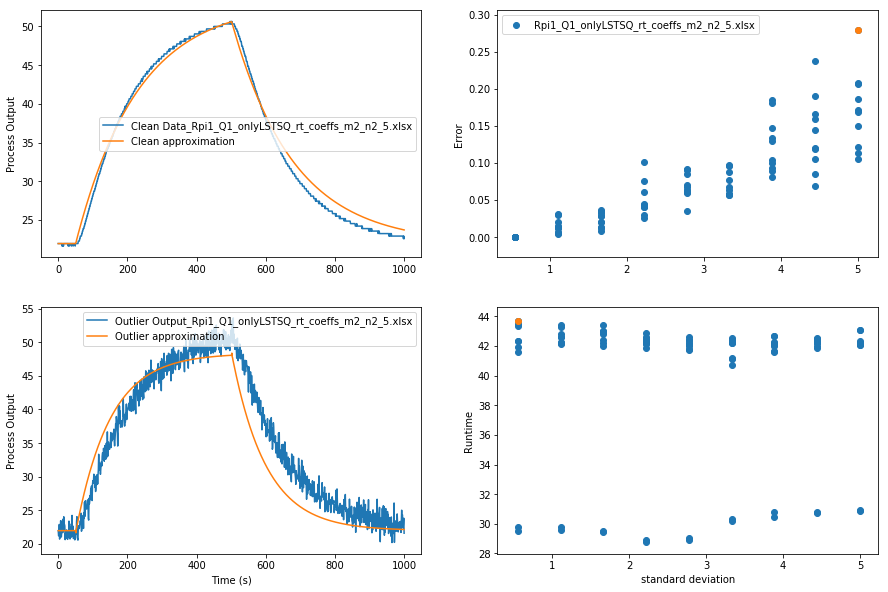

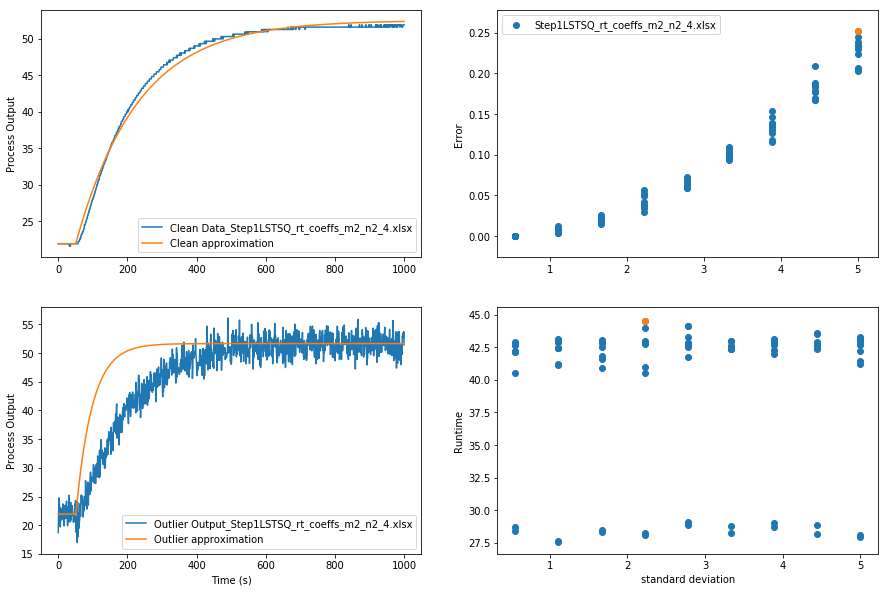

In [45]:
for method_name, method in ARX_Optimization.__dict__.items(): 
    if callable(method) and fnmatch.fnmatch(method_name, '*coeffs'):  # Get Identification Technique
        for dataname in os.listdir(input_datadir):  # Get data filename
            if dataname.endswith('.csv'):
                fig, ax = plt.subplots(2,2, figsize=(15,10))
                ax[1,0].set_xlabel('Time (s)')
                ax[1,1].set_xlabel('standard deviation')
                ax[1,1].set_ylabel('Runtime')
                ax[0,1].set_ylabel('Error')
                ax[0,0].set_ylabel('Process Output')
                ax[1,0].set_ylabel('Process Output')
                error = []
                runtime = []
                sigmas = []
                for resultname in os.listdir(result_datadir): # Get result filename
                    if resultname.endswith('.xlsx') and fnmatch.fnmatch(os.path.splitext(resultname)[0], '*'+os.path.splitext(dataname)[0]+'*') and fnmatch.fnmatch(os.path.splitext(resultname)[0], '*'+method_name+'*') and fnmatch.fnmatch(os.path.splitext(resultname)[0], '*m'+str(m)+'_n'+str(n)+'*'): #group result filenames that match the data filename and ID technique
                        dfr = pandas.read_excel(result_datadir/resultname, sheet_name='ID_Results', header=None)
                        data = pandas.read_csv(input_datadir/dataname)
                        max_error = 0
                        for i in range(1,len(dfr)):
                            difference=[] 
                            for j in range(m+n):
                                difference.append(abs(dfr[j][0] - dfr[j][i]))
                            prev_max_error = max_error
                            error.append(sum(difference))
                            runtime.append(dfr[j+1][i])
                            sigmas.append(dfr[j+2][i])
                            max_error = max(error)
                        if max_error > prev_max_error:
                            idx = error.index(max_error)
                            outlier_run = resultname
                            dfd_outlier = pandas.read_excel(result_datadir/outlier_run, sheet_name='Input_Data', header=None)
                            dfr_outlier = pandas.read_excel(result_datadir/outlier_run, sheet_name='ID_Results', header=None)
                            if idx < 9:
                                pt = idx
                            else:
                                pt = int(str(idx)[1])
                            
                            output_outlier = dfd_outlier[pt]
                print(method_name, dataname, outlier_run, max_error)           
                sim_clean = ARX_Optimization.simulate(dfr_outlier.loc[0][:m+n].values, data.Q1.values, m, n) + dfd_outlier[1][0] #change Q1 to work for any data set or code specific process inputs
                ax[0,0].plot(dfd_outlier[0].values, dfd_outlier[1], label = 'Clean Data'+'_'+outlier_run)
                ax[0,0].plot(dfd_outlier[0].values, sim_clean, label='Clean approximation')
               
                sim_outlier = ARX_Optimization.simulate(dfr_outlier.loc[pt][:m+n].values, data.Q1.values, m, n) + dfd_outlier[1][0] #change Q1 to work for any data set or code specific process inputs
                ax[1,0].plot(dfd_outlier[0].values, output_outlier, label = 'Outlier Output'+'_'+outlier_run)
                ax[1,0].plot(dfd_outlier[0].values, sim_outlier, label='Outlier approximation')
                
                ax[0,1].scatter(sigmas, error, label=outlier_run)
                ax[0,1].scatter(sigmas[idx], max_error)
                
                ax[1,1].scatter(sigmas, runtime)
                ax[1,1].scatter(sigmas[runtime.index(max(runtime))], max(runtime))
                
                ax[0,0].legend()
                ax[1,0].legend()
                ax[0,1].legend()


